# Exercise 4.1: Principal Component Analysis

In the current exercise, we will explore some properties, as well as limits, of Principal Component Analysis.

### Exploring data and plotting the Principal Components
__Task__: Given the two-dimensional zero-mean unlabeled dataset, compute and plot the principal components (PCs) together with the scatter plot of the data. Use the eigenvalue decomposition of the covariance matrix of the data to find the PC.

__Hint 1__: The directions of the PCs are given by the eigenvectors of the sample covariance matrix.

__Hint 2__: Scale length of the PCs using the square root of the eigenvalues of sample covariance matrix.

[[ 0.71039087 -0.70380737]
 [ 0.70380737  0.71039087]]
[1.60475502 0.32686547]


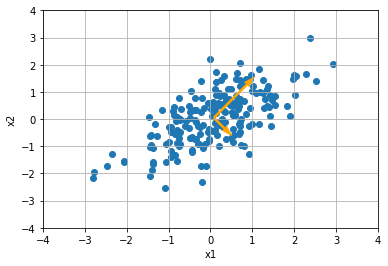

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load data
X = np.loadtxt('data/PCA_1.data')
N_samples = X.shape[0]

# compute covariance matrix
cov = np.cov(X.T)

# compute eigenvalue decomposition and sort eigenvalues if necessary
e_vals, e_vecs = np.linalg.eig(cov)
sd = np.sqrt(e_vals)

#e_vecs = e_vecs * e_vals

# plot
plt.scatter(X[:, 0], X[:, 1])

m = np.mean(X, axis=0)
plt.quiver(*m, e_vecs[0, 0], e_vecs[0, 1], color=['orange','b'], scale=np.sqrt(e_vals[0])*10)
plt.quiver(*m, e_vecs[1, 0], e_vecs[1, 1], color=['orange','b'], scale=np.sqrt(e_vals[1])*10)


for idx_col in range(e_vecs.shape[1]):
    pass
    #plt.plot([0,e_vecs[0,idx_col]*np.sqrt(e_vals[idx_col])],[0,e_vecs[1,idx_col]*np.sqrt(e_vals[idx_col])],c='r',lw=3)
    
print(e_vecs)
print(e_vals)

    
#plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.show()

__Important note__ : Computational complexity of calculating the eigenvalue decomposition grows cubically with the number of features. Therefore, iterative approaches for computing the PCs are prefered when dealing with high dimensional data.

### How outliers and scaling of the data affect PCA

The following dataset is similar to the one analyzed before, however it contains outliers. Explore the PCs again in the presence of outliers.

__Task:__ Compute and plot the PCs together with the scatter plot of the data.

__Q4.1.1 Why and how is PCA prone to fail in the presence of outliers?__

__Q4.1.2 How does the scaling of the features affect PCA? For example: Using centimeters instead of meters.__

__Hint:__ PCA uses variance of the data as criterion to find the PCs.

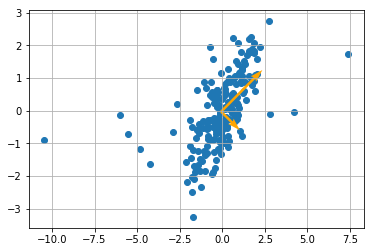

In [139]:
# load data
X = np.loadtxt('data/PCA_2.data')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
e_vals, e_vecs = np.linalg.eig(cov)

# plot
plt.scatter(X[:, 0], X[:, 1])

m = np.mean(X, axis=0)
plt.quiver(*m, e_vecs[0, 0], e_vecs[0, 1], color=['orange','b'], scale=np.sqrt(e_vals[0])*10)
plt.quiver(*m, e_vecs[1, 0], e_vecs[1, 1], color=['orange','b'], scale=np.sqrt(e_vals[1])*10)

plt.grid()
plt.show()

### Dimensionality reduction with PCA as preprocessing for classification problems

In the following exercise, we will see how PCA can be used to reduce the dimensionality of a dataset as a pre-processing stage for a classification task.

__Task 3__: For the first dataset, plot the PCs together with the scatter plot of the labelled data. Set the color of each of the points according to its class.

__Task 4__: Project the data onto each of the PCs and plot the projection. 

__Q4.1.3 Which of the PCs is more adequate to perform dimensionality reduction in the labelled dataset? Why?__ 


[3.15893206 0.54315674]
[[ 0.7247226  -0.68904074]
 [ 0.68904074  0.7247226 ]]


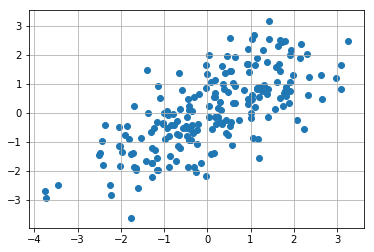

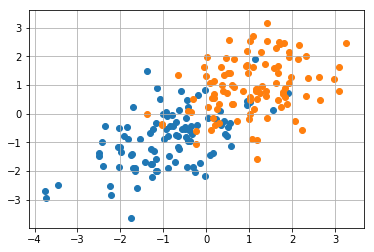

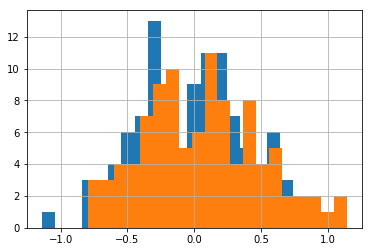

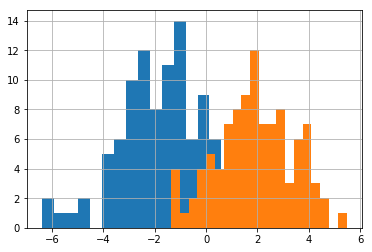

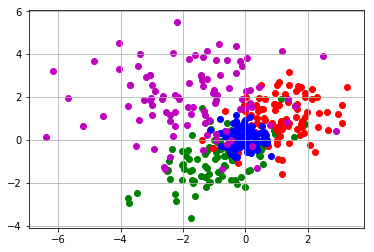

In [180]:
# load data
X = np.loadtxt('data/PCA_3.data')
y = np.loadtxt('data/PCA_3.labels')
N_samples = X.shape[0]

# compute covariance matrix
cov = np.cov(X.T)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary

e_val, e_vec = np.linalg.eig(cov)
print(e_val)
print(e_vec)

# plot original data
c1 = X[np.where(y==0)[0]]
c2 = X[np.where(y==1)[0]]

plt.scatter(X[:, 0], X[:, 1])

plt.grid()
plt.show()

plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.grid()
plt.show()




# plot data projection (first eigenvector)
p1 = np.empty((c1.shape[0], 1))

for i in range(len(c1)):
    p1[i] = np.dot(e_vec[0], c1[i]) * (1 / np.sqrt(e_val[0]))

plt.hist(p1, bins=20)







p2 = np.empty((c2.shape[0], 1))

for i in range(c2.shape[0]):
    p2[i] = np.dot(e_vec[0], c2[i]) * (1 / np.sqrt(e_val[0]))

plt.hist(p2, bins=20)
plt.grid()
plt.show()






# plot data projection (second eigenvector)
p3 = np.empty((len(c1), 1))

for i in range(len(c1)):
    p3[i] = np.dot(e_vec[1], c1[i]) * (1 / np.sqrt(e_val[1]))
    
plt.hist(p3, bins=20)







p4 = np.empty((len(c2), 1))

for i in range(len(c2)):
    p4[i] = np.dot(e_vec[1], c2[i]) * (1 / np.sqrt(e_val[1]))
    
plt.hist(p4, bins=20)
plt.grid()
plt.show()





plt.scatter(c1[:, 0], c1[:, 1], color="g")
plt.scatter(c2[:, 0], c2[:, 1], color="r")
plt.scatter(p1, p2, color="b")
plt.scatter(p3, p4, color="m")

plt.grid()
plt.show()



__Task 5__ Repeat tasks 3 and 4 for the following dataset.

__Q4.1.4 What is the most relevant PC in this case, given that the goal is to perform dimensionality reduction for a classification task?__

[1.79798406 0.63329142]
[[-0.66196714 -0.74953286]
 [-0.74953286  0.66196714]]


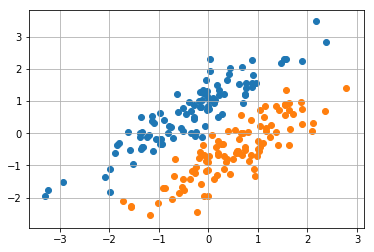

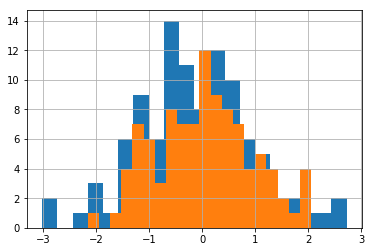

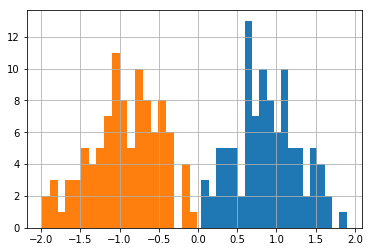

In [187]:
# load data
X = np.loadtxt('data/PCA_4.data')
y = np.loadtxt('data/PCA_4.labels')
N_samples = X.shape[0]

# compute covariance matrix
cov = np.cov(X.T)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
e_val, e_vec = np.linalg.eig(cov)
idx_ordered =  np.argsort(e_val)[::-1]
e_vec = e_vec[:,idx_ordered]  
e_val = e_val[idx_ordered]
print(e_val)
print(e_vec)

# plot original data
c1 = X[np.where(y==0)[0]]
c2 = X[np.where(y==1)[0]]
plt.scatter(c1[:, 0], c1[:, 1])
plt.scatter(c2[:, 0], c2[:, 1])

plt.grid()
plt.show()

# plot data projection (first eigenvector)
p1 = np.empty((c1.shape[0], 1))

for i in range(len(c1)):
    p1[i] = np.dot(e_vec[0], c1[i]) * (1 / np.sqrt(e_val[0]))

plt.hist(p1, bins=20)







p2 = np.empty((c2.shape[0], 1))

for i in range(c2.shape[0]):
    p2[i] = np.dot(e_vec[0], c2[i]) * (1 / np.sqrt(e_val[0]))

plt.hist(p2, bins=20)
plt.grid()
plt.show()


# plot data projection (second eigenvector)
p3 = np.empty((len(c1), 1))

for i in range(len(c1)):
    p3[i] = np.dot(e_vec[1], c1[i]) * (1 / np.sqrt(e_val[1]))
    
plt.hist(p3, bins=20)







p4 = np.empty((len(c2), 1))

for i in range(len(c2)):
    p4[i] = np.dot(e_vec[1], c2[i]) * (1 / np.sqrt(e_val[1]))
    
plt.hist(p4, bins=20)
plt.grid()
plt.show()

### PCA for dimensionality reduction: Selecting the number of PCs in a high dimensional dataset
In this section, we will explore the criteria that might be used to select the number of components for a dimensionality reduction task using PCA.

__Task 6__: Plot the eigenvalue spectrum of the following dataset. 

__Q4.1.5: By visually inspecting the eigenvalue spectrum of the covariance matrix, how many components do you think are necessary to achieve a good representation of the variance of the data?__

__Hint:__ The magnitude of the eigenvalues represents the contribution of the corresponding PCs to the variance of the data.

In [5]:
# load data
X = np.loadtxt('data/PCA_5.data')
N_samples = X.shape[0]

# compute covariance matrix

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary

# plot eigenvalue spectrum

Visually inspecting the eigenvalue spectrum of the covariance matrix do not always provide a clear criterion for the selection of the number of relevant components. If visualization does not deliver a clear cut-off point, an alternative criterion might be used: Typically, the number of PCs is selected so as to accumulate an __arbitrary__ amount of the variance, e.g. 90%, 95% or 99% of accumulated variance.

__Q4.1.6: Using the cumulative variance criterion, how many components should be selected for performing dimensionality reduction in the following dataset?__


In [6]:
# load data
X = np.loadtxt('data/PCA_6.data')
N_samples = X.shape[0]

#compute covariance matrix

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary

# plot eigenvalue spectrum